# Day 15 - Connections

## Data

Natural Earth Countries and Rivers/Lakes

https://www.naturalearthdata.com/

In [47]:
import geopandas as gpd

countries = gpd.read_file('../data_archive/ne_10m_admin_0_countries.shp')
rivers = gpd.read_file('../data_archive/ne_10m_rivers_lake_centerlines.shp')



In [48]:
rivers.sample(3)

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
68,1053River,9.0,River,Tsna,None,1053,None,7.1,Tsna,8.1,...,None,None,Цна,None,None,None,茨納河,4,1159110293,"LINESTRING (41.72552 52.19363, 41.70696 52.176..."
1011,696Lake Centerline,8.0,Lake Centerline,None,None,696,None,7.0,None,8.0,...,None,None,None,None,None,None,None,0,1159125825,"LINESTRING (-57.78828 -17.62200, -57.78828 -17..."
357,243Lake Centerline,6.0,Lake Centerline,Albany,None,243,None,5.0,Albany,6.0,...,Albany,Rio Albany,Олбани,Albany,None,None,None,4,1159114709,"MULTILINESTRING ((-91.92927 51.89236, -91.9359..."


In [146]:
countries.sample(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
221,Admin-0 country,5,6,United Kingdom,GB1,1,2,Country,Guernsey,GGY,...,건지 섬,Guernsey,Guernsey,Guernsey,Гернси,Guernsey,Guernsey,Guernsey,根西岛,"MULTIPOLYGON (((-2.58023 49.49360, -2.55956 49..."
183,Admin-0 country,5,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,바하마,Bahama's,Bahamy,Bahamas,Багамские Острова,Bahamas,Bahamalar,Bahamas,巴哈马,"MULTIPOLYGON (((-72.99957 21.45171, -73.03366 ..."
93,Admin-0 country,0,2,Iran,IRN,0,2,Sovereign country,Iran,IRN,...,이란,Iran,Iran,Irão,Иран,Iran,İran,Iran,伊朗,"MULTIPOLYGON (((44.80699 39.63990, 44.80965 39..."


In [147]:
rivers.loc[rivers['name'].isin(['Danube', 'Donau'])]

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
389,25River,2.0,River,Danube,None,25,None,2.1,Danube,3.1,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159115307,"MULTILINESTRING ((17.20647 48.06110, 17.24293 ..."
566,38River,2.0,River,Donau,Danube,38,None,2.1,Danube,3.1,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159118769,"MULTILINESTRING ((12.50880 48.92760, 12.50660 ..."


In [148]:
rivers.loc[rivers['name_en'].isin(['Danube'])].to_crs(3035).length / 1000

389    1708.014438
566     862.758961
dtype: float64

In [149]:
danube = rivers.loc[rivers['name_en'].isin(['Danube'])].reset_index(drop=True)

In [150]:
danube

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,25River,2.0,River,Danube,None,25,None,2.1,Danube,3.1,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159115307,"MULTILINESTRING ((17.20647 48.06110, 17.24293 ..."
1,38River,2.0,River,Donau,Danube,38,None,2.1,Danube,3.1,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159118769,"MULTILINESTRING ((12.50880 48.92760, 12.50660 ..."


In [151]:
countries['CONTINENT'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'North America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [162]:
europe = countries.loc[countries['CONTINENT'].isin(['Europe', 'Asia', 'Africa'])].reset_index(drop=True)

In [163]:
# minx, miny, maxx, maxy
danube.total_bounds

array([ 8.17920983, 43.650336  , 28.74699955, 49.02753327])

In [164]:
europe['east_of_danube'] = europe.apply(lambda x: x['geometry'].bounds[0] > danube.total_bounds[2], axis=1)

In [165]:
len(europe.loc[~europe['east_of_danube']])

91

In [166]:
europe = europe.loc[~europe['east_of_danube']].reset_index(drop=True)

In [167]:
import matplotlib.pyplot as plt

eur = europe.to_crs(3035)
dan = danube.to_crs(3035)

eur['cent'] = eur.centroid
eur['cent_x'] = eur.apply(lambda g: g['cent'].x, axis=1)
eur['cent_y'] = eur.apply(lambda g: g['cent'].y, axis=1)


In [168]:
eur.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,east_of_danube,cent,cent_x,cent_y
0,Admin-0 country,0,3,South Sudan,SDS,0,2,Sovereign country,South Sudan,SDS,...,Южный Судан,Sydsudan,Güney Sudan,Nam Sudan,南苏丹,"POLYGON ((7410031.057 -1434985.203, 7402604.60...",False,POINT (6718051.390 -1338043.297),6.718051e+06,-1.338043e+06
1,Admin-0 country,0,2,France,FR1,1,2,Country,France,FRA,...,Франция,Frankrike,Fransa,Pháp,法国,"MULTIPOLYGON (((-2791198.284 676159.767, -2793...",False,POINT (2917582.112 2360365.545),2.917582e+06,2.360366e+06
2,Admin-0 country,0,3,Morocco,MAR,0,2,Sovereign country,Morocco,MAR,...,Марокко,Marocko,Fas,Maroc,摩洛哥,"POLYGON ((2442127.286 751137.632, 2441946.060 ...",False,POINT (2502653.046 977364.805),2.502653e+06,9.773648e+05


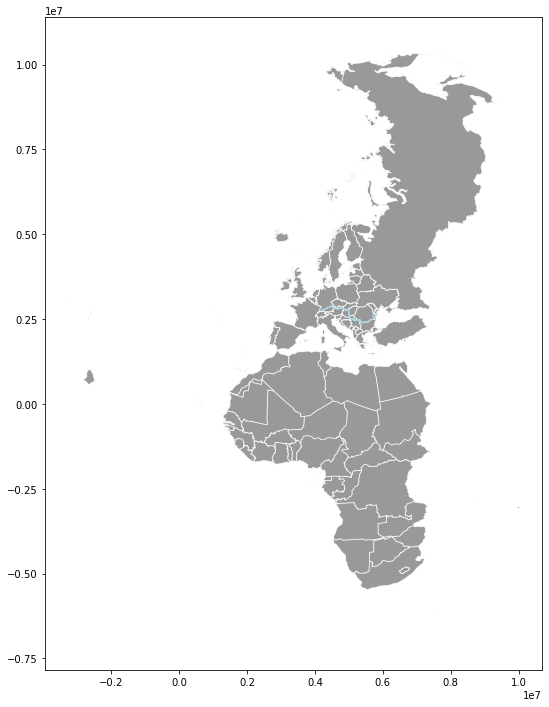

In [169]:
fig, ax = plt.subplots(figsize=(15,12))

eur.plot(facecolor='grey', edgecolor='white', lw=0.8, alpha=0.8, ax=ax)

# add countries names 
# for idx, row in eur.iterrows():
#     plt.text(row['cent_x'], row['cent_y'],"{}\n".format(row['ISO_A2'],),size=10, color='black')

dan.plot(ax=ax, color='lightblue', lw=1.5 )
plt.show()

In [206]:
import shapely.geometry as sg

buff = dan.buffer(2000000)
# minx, miny, maxx, maxy
b = list(buff.total_bounds)

# box (minx, miny, maxx, maxy)
nbuff = sg.box(minx=b[0]-1000, miny=b[1]+500, maxx=b[2]-500, maxy=b[3]+1000)

t = gpd.clip(eur, nbuff)

def has_danube(row):
    return any(dan.intersects(row['geometry']))

t['has_danube'] = t.apply(has_danube, axis=1)

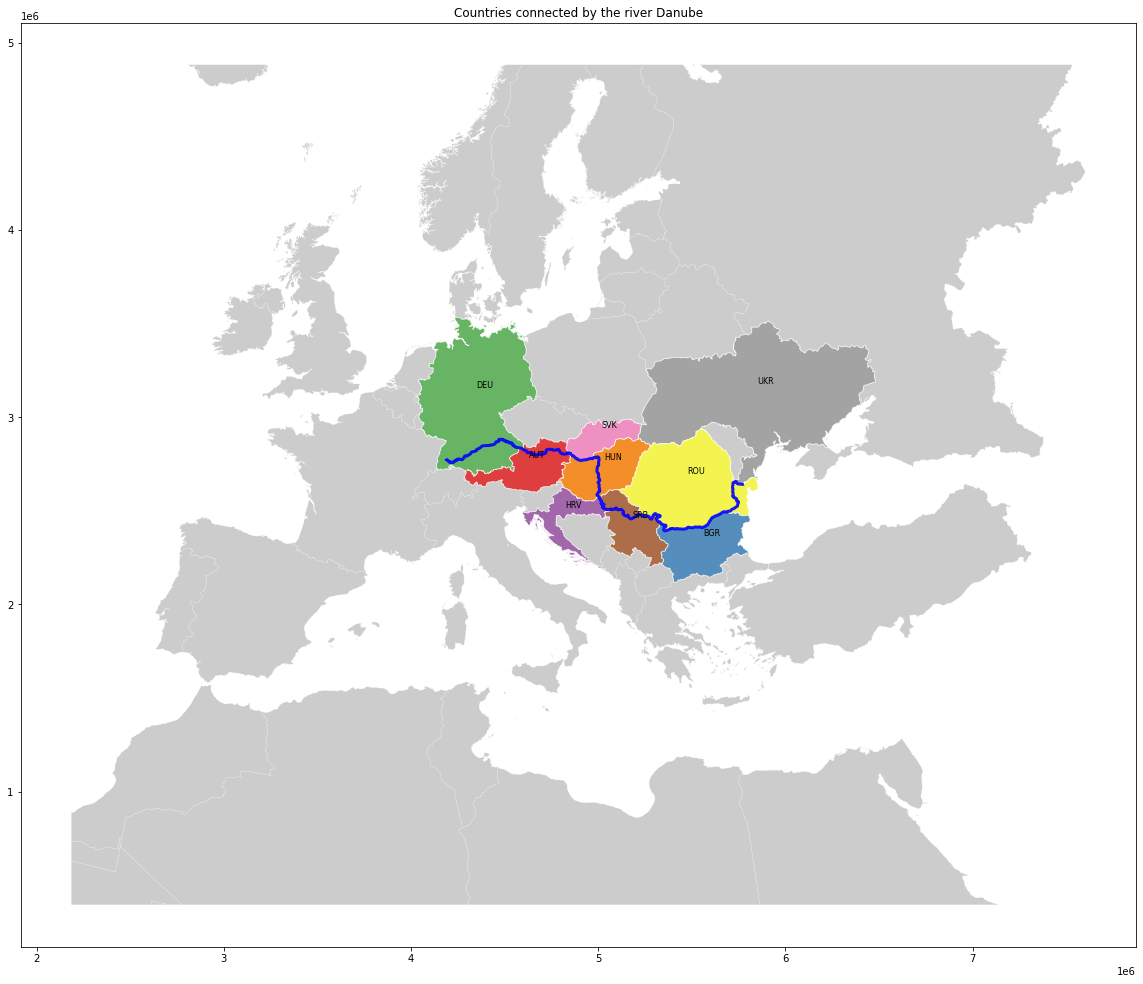

In [216]:
fig, ax = plt.subplots(figsize=(21,17))

t.plot(facecolor='grey', edgecolor='white', lw=0.5, alpha=0.4, ax=ax)

# t.loc[t['CONTINENT'].isin(['Europe'])].plot(facecolor='grey', edgecolor='white', lw=0.8, alpha=0.8, ax=ax)

t.loc[t['has_danube']].plot(column='ISO_A3', categorical=True, cmap='Set1', edgecolor='white', lw=0.8, alpha=0.8, ax=ax)

# add countries names 
for idx, row in t.loc[t['has_danube']].iterrows():
    if not row['ISO_A3'] == '-99' and not row['ISO_A3'] == 'RU':
        plt.text(row['cent_x'], row['cent_y'],"{}\n".format(row['ISO_A3'],),size=8, color='black')

dan.plot(ax=ax, color='blue', lw=3, alpha=0.9, edgecolor='blue' )
plt.title('Countries connected by the river Danube')

plt.savefig('../source/_static/day-15-connections.png', bbox_inches='tight')

In [209]:
t.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [210]:
t['ISO_A3']

1     -99
2     MAR
3     ESH
6     UKR
7     BLR
10    LTU
11    RUS
12    CZE
13    DEU
14    EST
15    LVA
16    -99
17    SWE
18    FIN
19    LUX
20    BEL
21    MKD
22    ALB
23    -99
24    TUR
25    ESP
26    DNK
27    LBY
28    TUN
29    ROU
30    HUN
31    SVK
32    POL
33    IRL
34    GBR
35    GRC
42    AUT
43    ITA
44    CHE
45    NLD
46    LIE
48    SRB
49    MLI
54    HRV
55    SVN
58    BGR
59    SMR
61    MCO
62    DZA
63    AND
64    MNE
65    BIH
66    PRT
67    MDA
76    GIB
77    EGY
78    MRT
81    VAT
82    ISL
85    MLT
86    JEY
87    GGY
88    IMN
89    ALA
90    FRO
Name: ISO_A3, dtype: object